#### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
df_bos = pd.DataFrame(boston.data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                                           'DIS','RAD','TAX','PTRATIO','BLACK','LSTAT'])

In [3]:
df_price = pd.read_csv('housing.csv')
df_price.columns =['PRICE']
bos = pd.concat([df_bos,df_price], axis=1)

In [61]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,21.6
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,34.7
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,33.4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,36.2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.7


In [5]:
bos.shape

(506, 14)

#### Find if any missing value

In [6]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
PRICE      1
dtype: int64

#### Dropping the row which has null value

In [4]:
bos.dropna(axis=0,inplace=True)

In [63]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
PRICE      0
dtype: int64

In [64]:
bos['CHAS'].value_counts()

0.0    470
1.0     35
Name: CHAS, dtype: int64

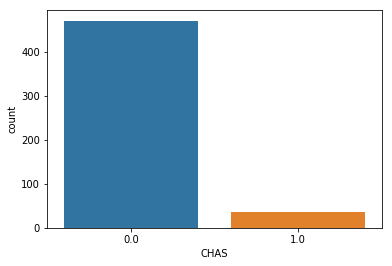

In [10]:
sns.countplot(x='CHAS', data = bos)

#### Find the Out Liers

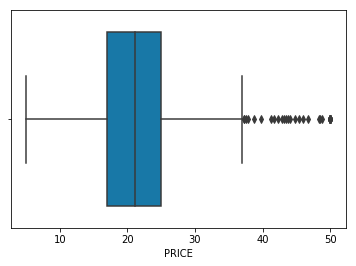

In [11]:
sns.boxplot(x='PRICE',data=bos,palette='winter')

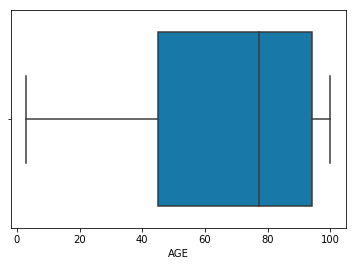

In [19]:
sns.boxplot(x='AGE',data=bos,palette='winter')

#### Observations

* Price more than 35 is to be considered as outliers
* Rows which are outliers can be treated by dropping it if numbers are not big

In [5]:
bos[bos['PRICE']>40].shape[0]/bos.shape[0]

0.061386138613861385

Only 6 % of data belong to outliers, so can drop rows with outliers value

In [6]:
Price_Outliers = bos[bos['PRICE']>40]
bos = bos.drop(Price_Outliers.index,axis=0)
bos.shape

(474, 14)

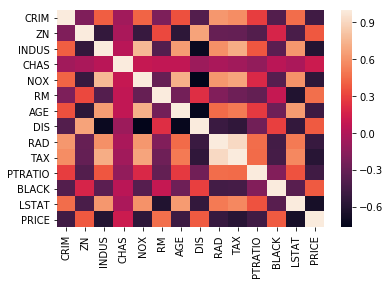

In [16]:
sns.heatmap(bos.corr())

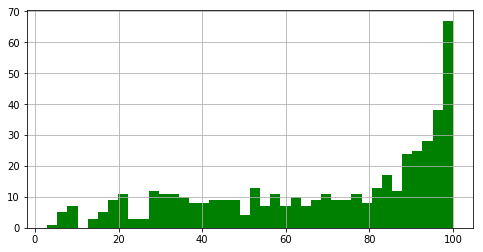

In [7]:
bos.AGE.hist(color='green',bins=40,figsize=(8,4))

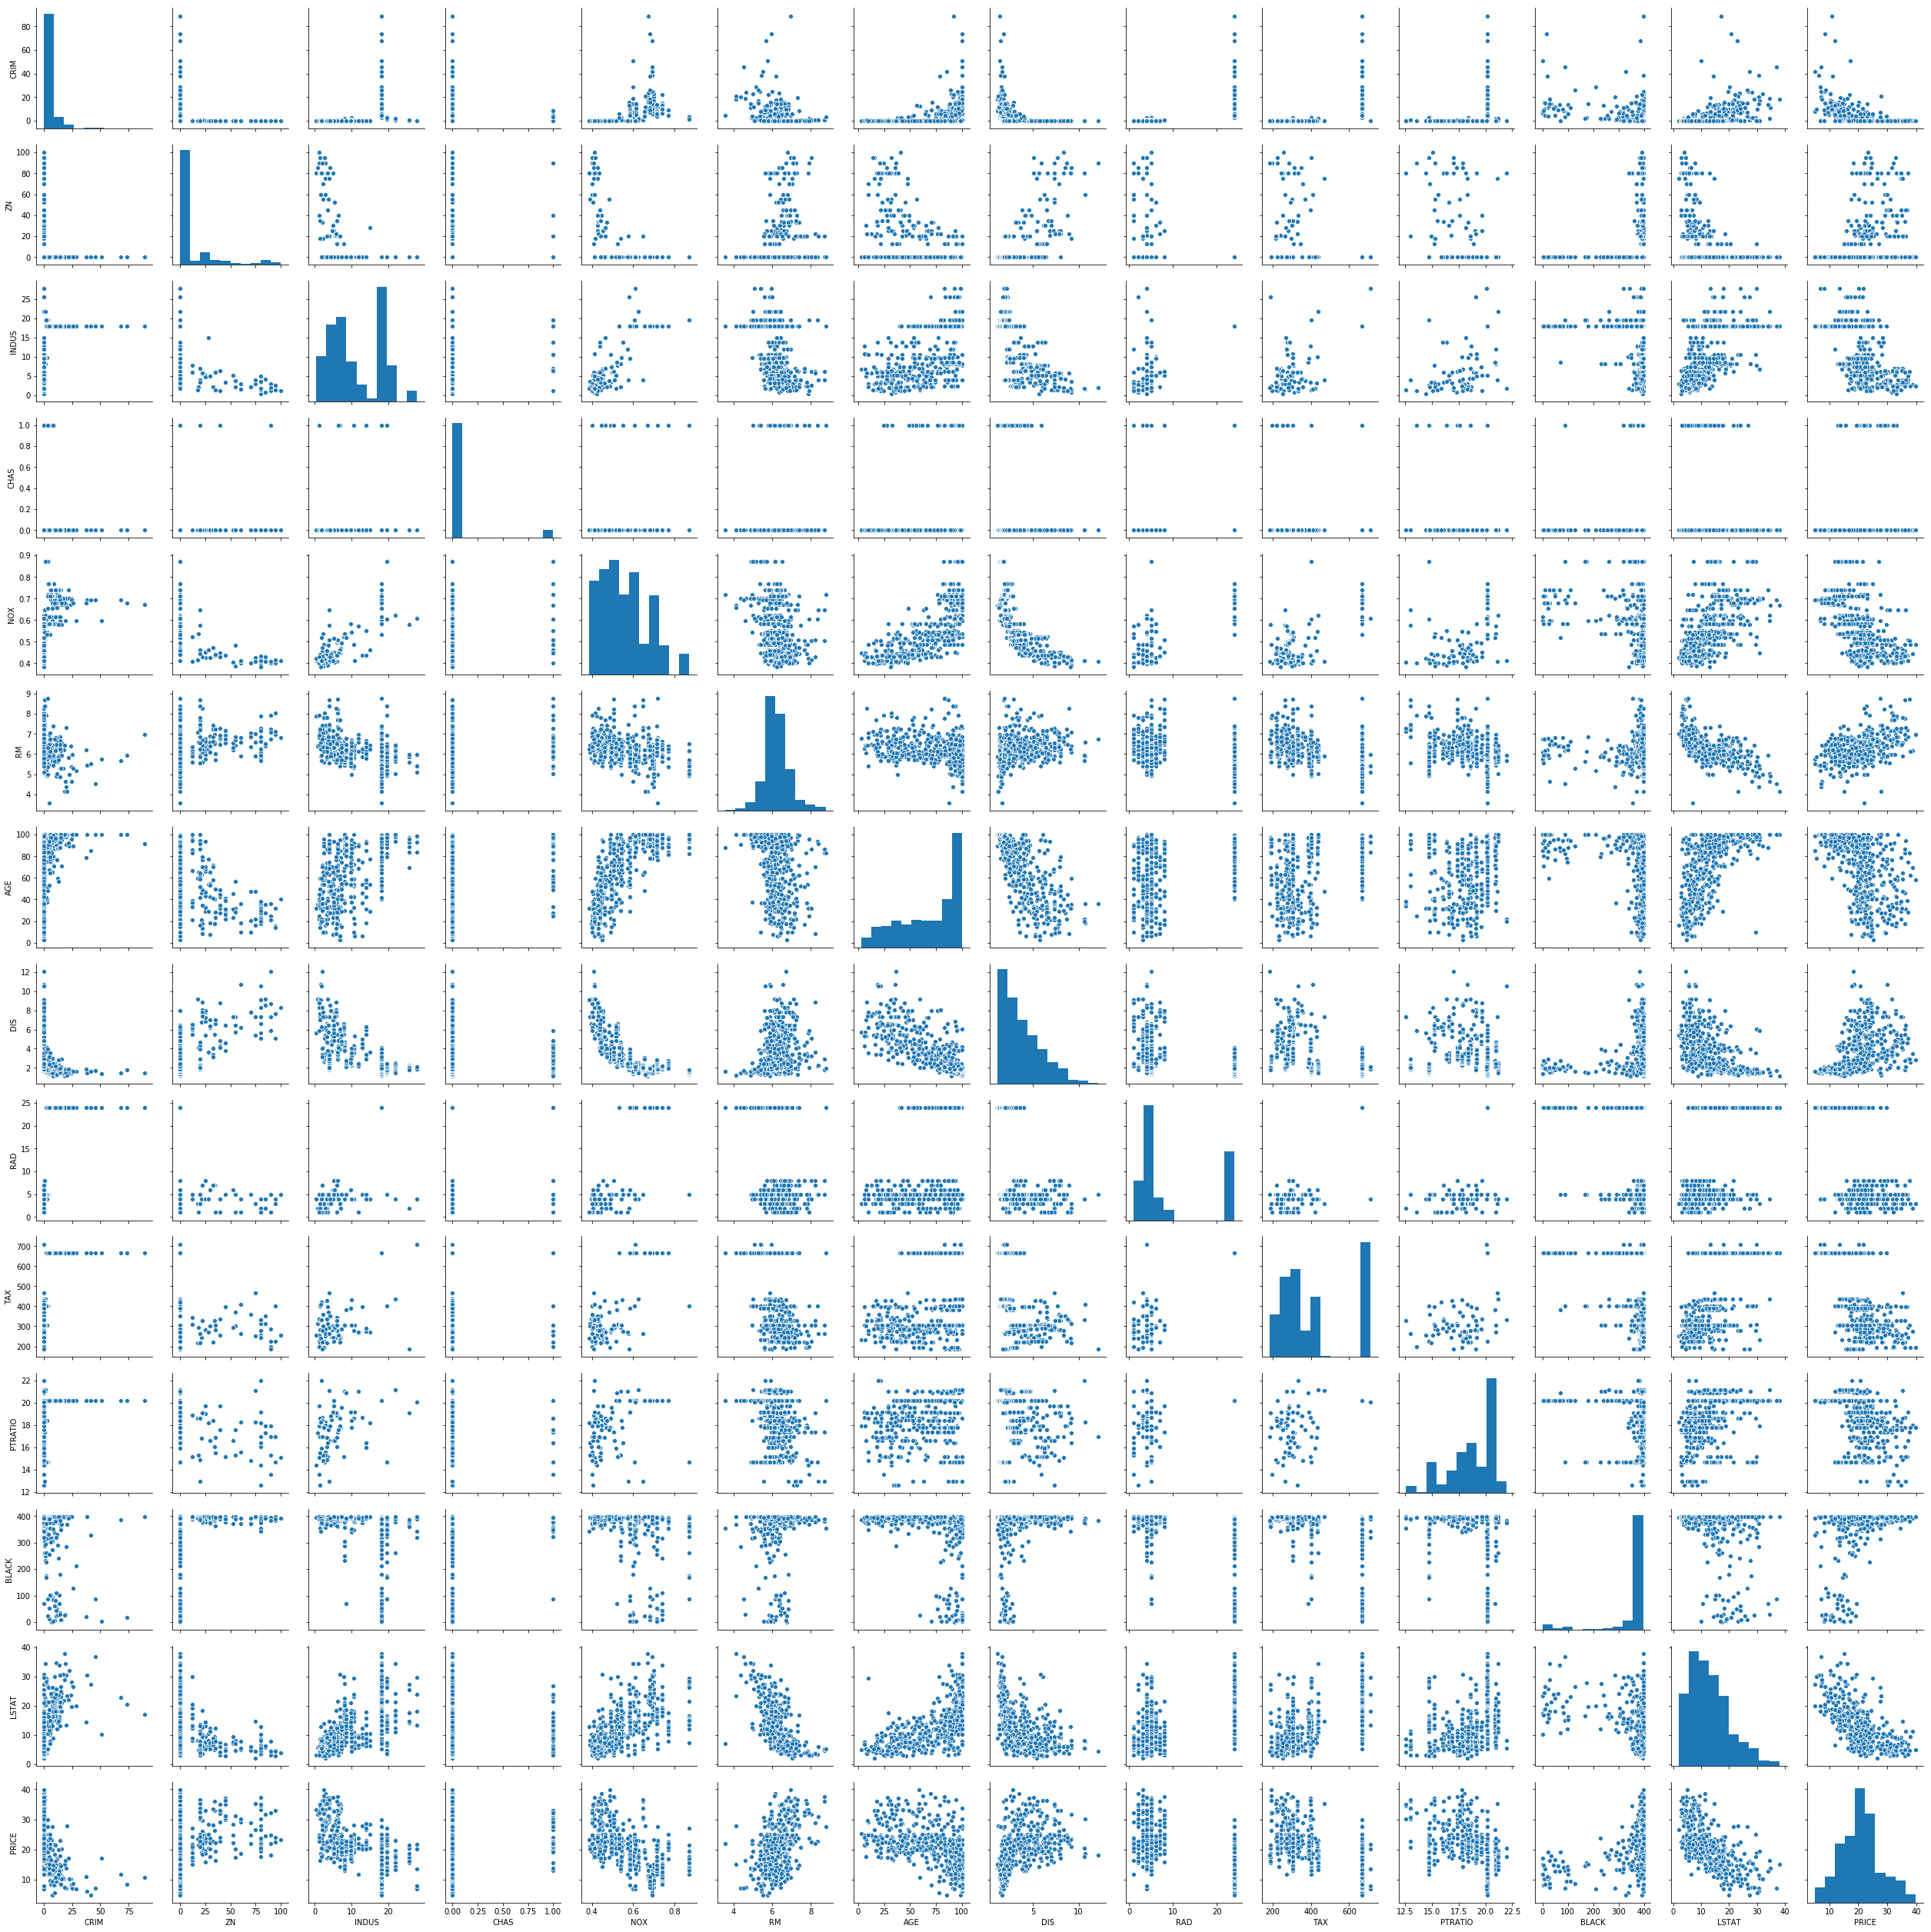

In [21]:
import seaborn as sns
sns.pairplot(bos)

### Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

In [9]:
X = bos.iloc[:,:-1]
y = bos.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [11]:
# print the intercept
print(lm.intercept_)

48.70547521901506


In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.107325
ZN,0.025516
INDUS,-0.188527
CHAS,2.915433
NOX,-17.445232
RM,0.531237
AGE,-0.014742
DIS,-1.098144
RAD,0.116727
TAX,-0.003999


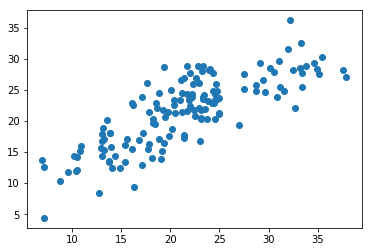

In [13]:
pred = lm.predict(X_test)
plt.scatter(y_test,pred)

### It is evident from above scattered graph that LIner Regression would give best result

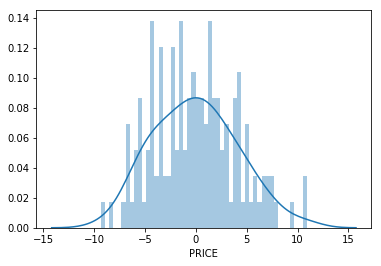

In [73]:
sns.distplot((y_test-pred),bins=50);

### Regression Evaluation Metrics

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.3251706515399637
MSE: 16.732396440773456
RMSE: 4.09052520353725


In [29]:
score = r2_score(y_test,pred)
print('The model Accuracy is : {}'.format(score))

The model Accuracy is : 0.6448282910012129


### Applying other Regression algorithms to prove Linear Regression will best fit for this case

#### Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
pred_dt=dtree.predict(X_test)
score = r2_score(y_test,pred_dt)
print('The model Accuracy is : {}'.format(score))

The model Accuracy is : 0.1907206930026265


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.3251706515399637
MSE: 16.732396440773456
RMSE: 4.09052520353725


#### Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rcr = RandomForestRegressor()
rcr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
pred_rc = rcr.predict(X_test)
score = r2_score(y_test,pred_rc)
print('The model Accuracy is : {}'.format(score))

The model Accuracy is : 0.547887895705812


#### XGBoost Regressor

In [24]:
import xgboost
from sklearn.model_selection import cross_val_score

In [25]:
xg = xgboost.XGBRegressor()
score = cross_val_score(xg,X,y,cv=20)
print('The model Accuracy is : {}'.format(score.mean()))

The model Accuracy is : -0.3484887801838063


In [26]:
xg.fit(X_train, y_train)
pred_xg = xg.predict(X_test)
score = r2_score(y_test,pred_xg)
print('The model Accuracy is : {}'.format(score))

The model Accuracy is : 0.5923227166156673
